In [1]:
import pandas as pd

In [2]:
#worldbank
data=pd.read_excel(r'C:\Users\admin\Desktop\inflation\worldbank.xlsx')
#sama+gasta
#data1=pd.read_excel(r'C:\Users\admin\Desktop\inflation\inflation_cpi_ord.xlsx')

In [8]:
print(len(data))
#print(len(data1))

58


In [9]:
print(data.columns)
#print(data1.columns)

Index(['ear', 'Saudi Arabia'], dtype='object')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ear           58 non-null     int64  
 1   Saudi Arabia  58 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [11]:
#data1.info()

Text(0, 0.5, 'inflation')

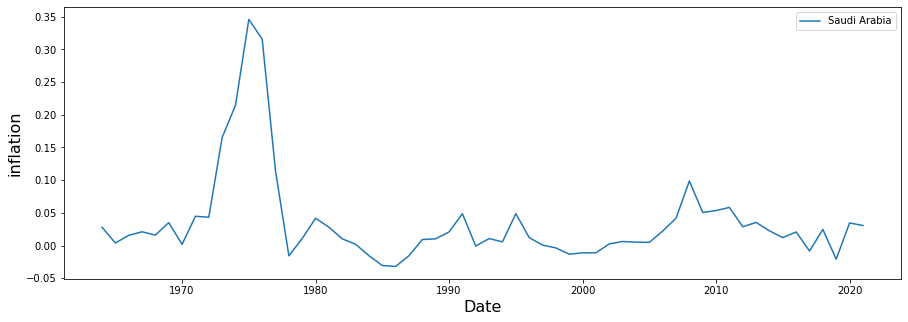

In [12]:
import matplotlib.pyplot as plt
data.sort_values(by='ear').plot(x='ear', y='Saudi Arabia',figsize=(15,5))
plt.xlabel("Date",size=16)
plt.ylabel("inflation",size=16)

Text(0, 0.5, 'inflation')

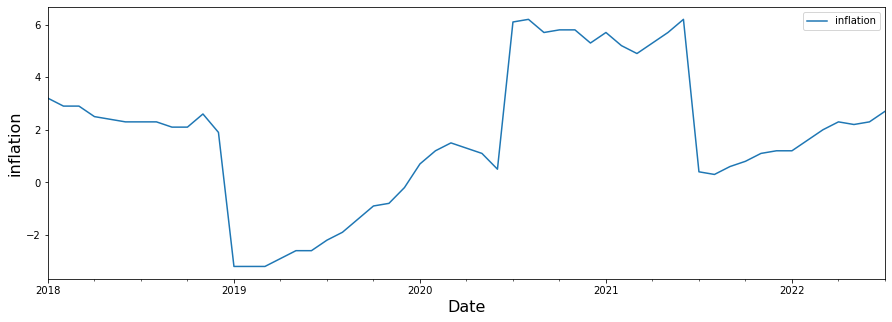

In [8]:
import matplotlib.pyplot as plt
data1.sort_values(by='Date').plot(x='Date', y='inflation',figsize=(15,5))
plt.xlabel("Date",size=16)
plt.ylabel("inflation",size=16)

In [ ]:
#the staitionary

In [13]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Saudi Arabia'])
#to help you, we added the names of every value
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))
# p-value is less than 0.05 this means our null hypothesis is True
#and we will take this series as stationary.

{'adf': -3.5194699394835682,
 'pvalue': 0.007500919636873075,
 'usedlag': 1,
 'nobs': 56,
 'criticalvalues': {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 'icbest': -192.09423176489457}

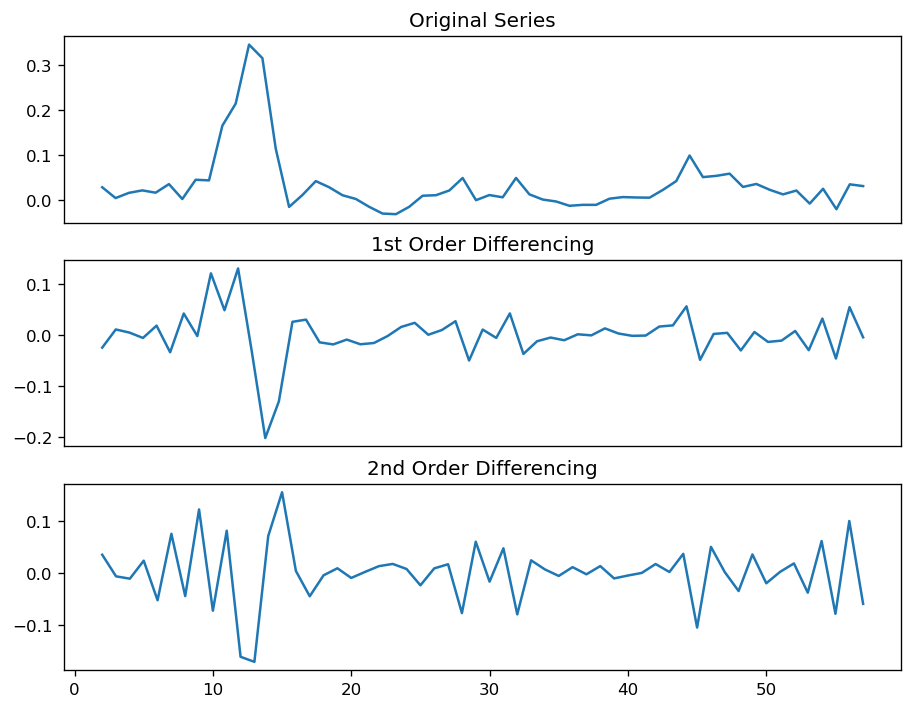

In [10]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data['Saudi Arabia']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data['Saudi Arabia'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data['Saudi Arabia'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

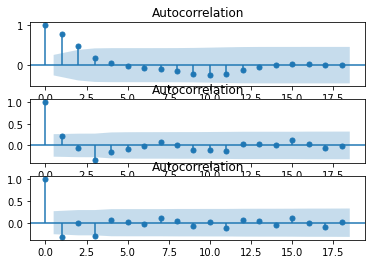

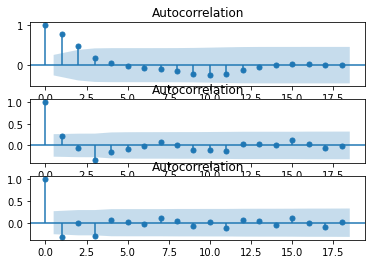

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data['Saudi Arabia'], ax=ax1)
plot_acf(data['Saudi Arabia'].diff().dropna(), ax=ax2)
plot_acf(data['Saudi Arabia'].diff().diff().dropna(), ax=ax3)


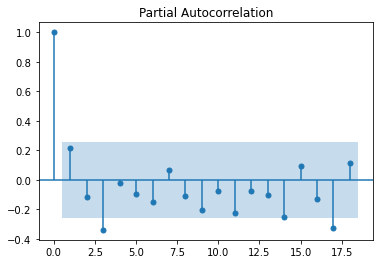

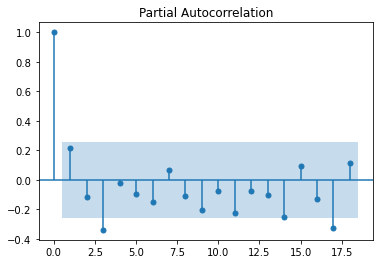

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Saudi Arabia'].diff().dropna())

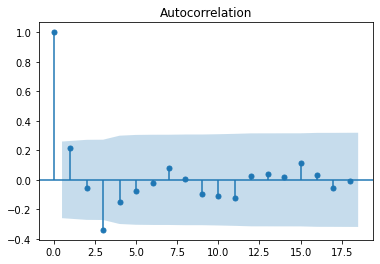

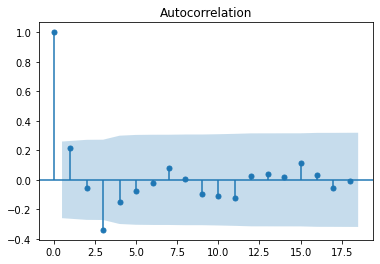

In [16]:
plot_acf(data['Saudi Arabia'].diff().dropna())

<AxesSubplot:xlabel='ear'>

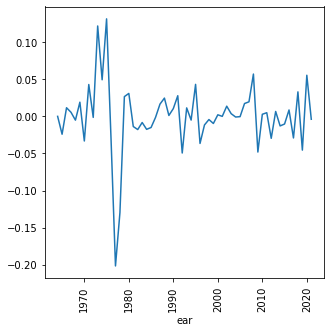

In [17]:
#diffrence
data['1difference']=data['Saudi Arabia']-data['Saudi Arabia'].shift(1)
data.groupby(['ear'])['1difference'].sum().plot(kind='line',x='ear',y='1difference',rot='vertical',figsize=(5,5))

In [18]:
result=adfuller(data['1difference'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -5.684373696396555,
 'pvalue': 8.344575973137874e-07,
 'usedlag': 2,
 'nobs': 54,
 'criticalvalues': {'1%': -3.55770911573439,
  '5%': -2.9167703434435808,
  '10%': -2.59622219478738},
 'icbest': -161.53316573047744}

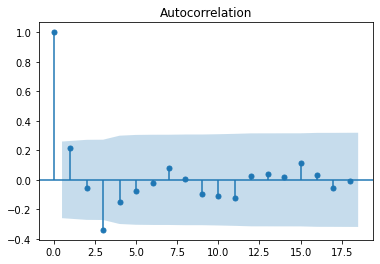

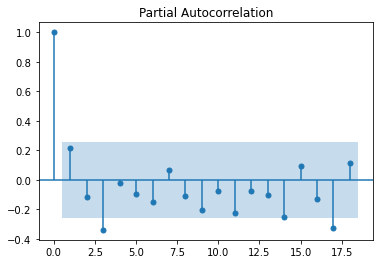

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1=plot_acf(data['1difference'].dropna())
fig2=plot_pacf(data['1difference'].dropna())

<AxesSubplot:xlabel='ear'>

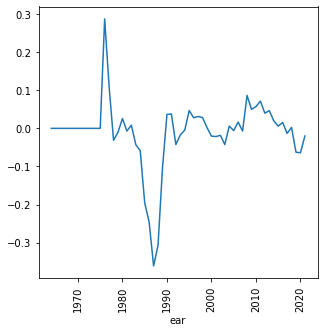

In [20]:
#seasonal diffrences
data['Seasonal_Difference']=data['Saudi Arabia']-data['Saudi Arabia'].shift(12)
data.groupby(['ear'])['Seasonal_Difference'].sum().plot(kind='line',x='ear',y='Seasonal_Difference',rot='vertical',figsize=(5,5))


In [21]:
result=adfuller(data['Seasonal_Difference'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -3.2326759892695662,
 'pvalue': 0.018169482506651465,
 'usedlag': 1,
 'nobs': 44,
 'criticalvalues': {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 'icbest': -108.55290698462159}

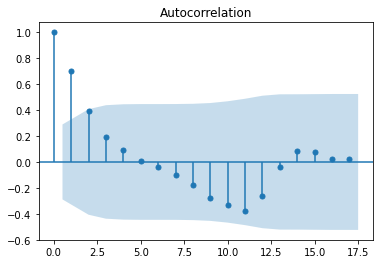

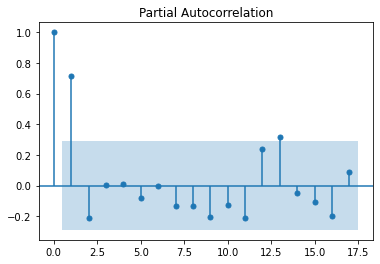

In [22]:
fig1=plot_acf(data['Seasonal_Difference'].dropna()) #q value          
fig2=plot_pacf(data['Seasonal_Difference'].dropna()) # p value

In [23]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Saudi Arabia'],order=(2,0,2))#(2,0,1)
result=model.fit()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Saudi Arabia   No. Observations:                   58
Model:                     ARMA(2, 2)   Log Likelihood                 105.097
Method:                       css-mle   S.D. of innovations              0.039
Date:                Thu, 18 Aug 2022   AIC                           -198.194
Time:                        09:08:19   BIC                           -185.832
Sample:                             0   HQIC                          -193.379
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0351      0.018      1.922      0.055      -0.001       0.071
ar.L1.Saudi Arabia     0.1876      0.280      0.671      0.502      -0.360       0.736
ar.L2.Saudi Arabia     0.1502      0.213      0.704      0.481      -0.268       0.568
ma.L1.Saudi Arabia     0.8773      0.259      3.388      0.001       0.370       1.385
ma.L2.Saudi Arabia     0.5474      0.164      3.332      0.001       0.225       0.869
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0303           +0.0000j            2.0303            0.0000
AR.2           -3.2789           +0.0000j            3.2789            0.5000
MA.1           -0.8013           -1.0884j            1.3515           -0.3510
MA.2           -0.8013           +1.0884j            1.3515            0.3510
-----------------------------------------------------------------------------
"""

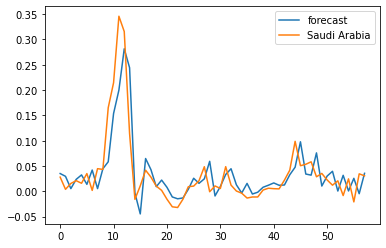

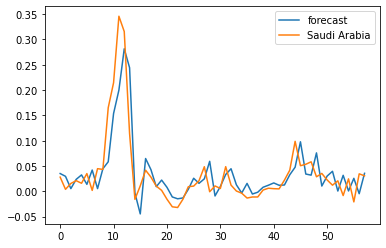

In [25]:
from matplotlib import pyplot as plt
result.plot_predict(dynamic=False)

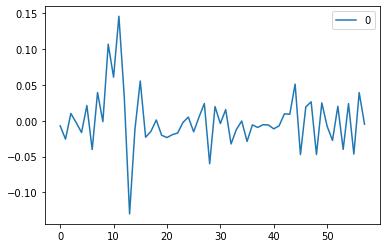

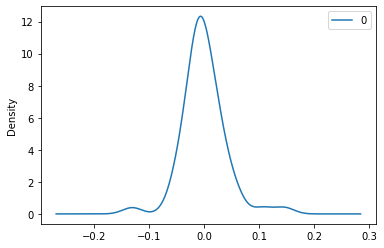

               0
count  58.000000
mean   -0.000146
std     0.039373
min    -0.130087
25%    -0.018902
50%    -0.005217
75%     0.019664
max     0.145849


In [26]:
from pandas import DataFrame
from matplotlib import pyplot

residuals = DataFrame(result.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [27]:
(result.predict(start=40 ,end=55 , dynamic=True))#*100

40    0.016526
41    0.024001
42    0.030222
43    0.032512
44    0.033876
45    0.034476
46    0.034793
47    0.034943
48    0.035019
49    0.035056
50    0.035074
51    0.035083
52    0.035087
53    0.035089
54    0.035090
55    0.035091
dtype: float64

In [28]:
data['Saudi Arabia'][40:55]

40    0.0052
41    0.0048
42    0.0221
43    0.0417
44    0.0987
45    0.0506
46    0.0534
47    0.0583
48    0.0287
49    0.0353
50    0.0224
51    0.0121
52    0.0207
53   -0.0084
54    0.0246
Name: Saudi Arabia, dtype: float64

In [29]:
len(data)

58

In [30]:
pred=result.predict(start=50 ,end=58 , dynamic=True)

In [31]:
forecast = pd.DataFrame(pred,index = data.index,columns=['Prediction'])


In [32]:
df=forecast.loc[forecast['Prediction'].notnull()]

In [33]:
df1 = pd.merge(df, data, left_index=True, right_index=True)
df1['diffre']=df1['Saudi Arabia']-df1['Prediction']
df1[['Saudi Arabia','Prediction','diffre']]
df1['diffre'].mean()*100

-2.2277847278765655

In [34]:
# df1

In [35]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(df1['Saudi Arabia'],df1['Prediction']))
print(rms)

0.02961444229344677


In [36]:
df1[['Saudi Arabia','Prediction','diffre']]*100

,Saudi Arabia,Prediction,diffre
50,2.24,3.017036,-0.777036
51,1.21,4.782187,-3.572187
52,2.07,3.673993,-1.603993
53,-0.84,3.731293,-4.571293
54,2.46,3.575572,-1.115572
55,-2.09,3.554972,-5.644972
56,3.45,3.527716,-0.077716
57,3.06,3.519509,-0.459509


##########################################

In [37]:
# data#.values

In [38]:
# cov_prl_=data.drop(['1difference', 'Seasonal_Difference'],axis=1)

In [39]:
# cov_prl_

In [40]:
# cov_prl_=cov_prl_.set_index(['ear'])
# cov_prl_

In [41]:
# from sklearn.metrics import mean_absolute_error ,mean_squared_error
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# from math import sqrt
# X = cov_prl_.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# #print(train)
# #print(test)
# history = [x for x in train]
# print(type(history))
# predictions = list()
# print(len(train))
# print(len(test))
# # walk-forward validation
# for t in range(len(test)):
# 	model = ARIMA (pd.DataFrame(history).values.reshape(-1), order=(2,0,2))
# 	model_fit = model.fit()
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

#################################

In [42]:
# from sklearn.metrics import mean_absolute_error ,mean_squared_error
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# from math import sqrt
# X = cov_prl_.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# #print(train)
# #print(test)
# history = [x for x in train]
# print(type(history))
# predictions = list()
# print(len(train))
# print(len(test))
# # walk-forward validation
# for t in range(len(test)):
# 	model = SARIMAX (pd.DataFrame(history).values.reshape(-1), order=(2,0,2))
# 	model_fit = model.fit()
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [43]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit1= SARIMAX(data["Saudi Arabia"], 
#               order=(2,0,2),seasonal_order=(1,2,1,12), 
#              trend='ct', simple_differencing=False,enforce_stationarity=False).fit()
# print(fit1.summary())

In [44]:
# fit1.predict(start=40, end=55, dynamic=True) 

In [45]:
# data[40:55]